In [59]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy.stats import poisson
import statistics
import xarray as xr

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')

In [3]:
hf.keys()

<KeysViewHDF5 ['data']>

In [4]:
data = np.array(hf.get('data'))

In [5]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [6]:
hf.close()

Problem 1

In this problem we are looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

As with most data, there are 'features.' Your lab instructor has helpfully incorporated the meta-data into your data file.

1) Down load the data from the course website (gammaray_lab4.h5), and import it into your working environment. The data has 4 columns and more than 25 million rows. The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts. Make a few plots, generally exploring your data and making sure you understand it. Give a high level description of the data features you see. Specifically comment on whether you see signal contamination in your data, and how you plan to build a background pdf().

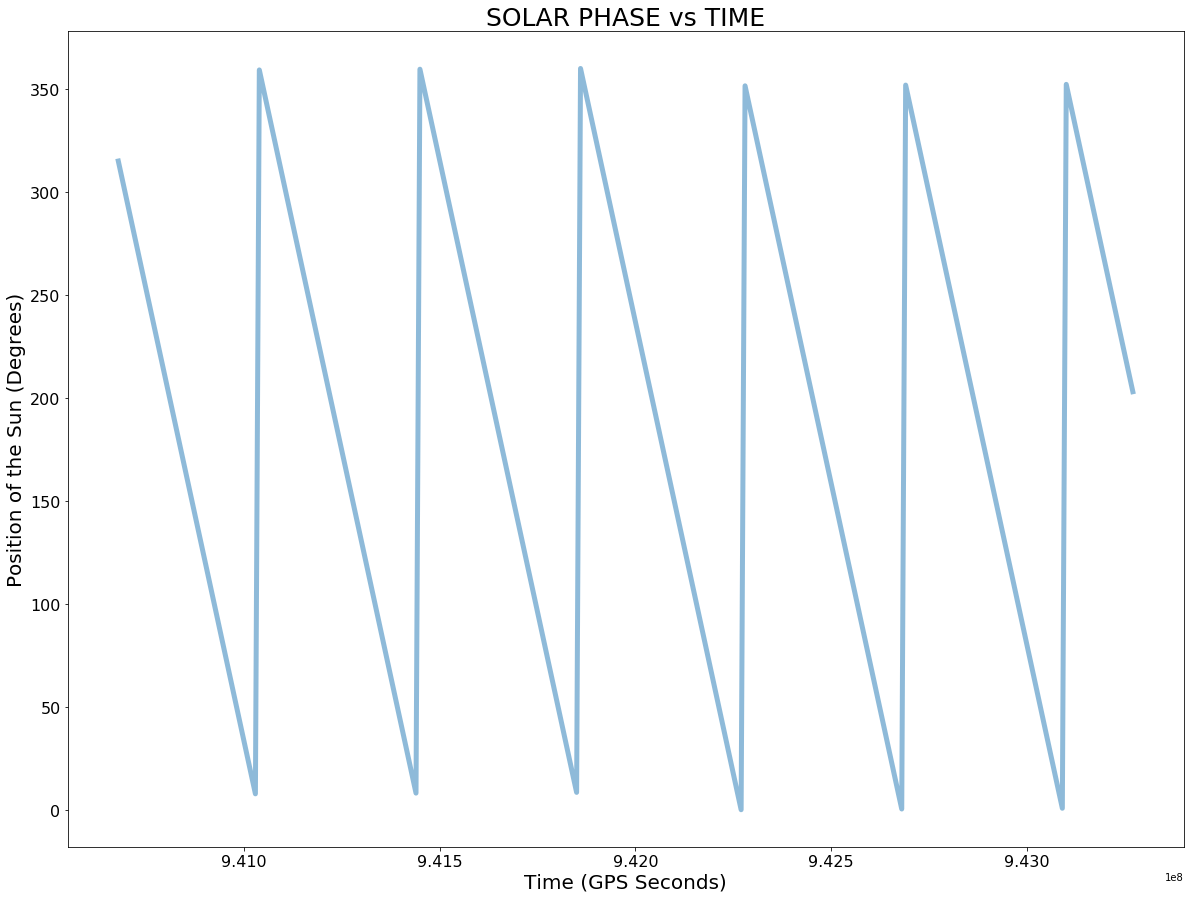

In [7]:
fig, ax = plt.subplots(1, 1)
ax.plot(data[0,::100000], data[1,::100000], lw=5, alpha=0.5)
plt.tick_params(labelsize = 16)
plt.title("SOLAR PHASE vs TIME",fontsize=25)
plt.xlabel("Time (GPS Seconds)", fontsize = 20)
plt.ylabel('Position of the Sun (Degrees)', fontsize = 20)
plt.show()

From the graph above, it shows the relationship between Time in gps second and position of the sun in degrees. As shown in the figure, a truly condensed chart is created using the raw ratio per 100,000 data points. This is because the satellite circles the Earth once every 90 minutes, which changes much faster than the sun's position relative to its orbit. If we change it to one in a million, we can get a better visualization of the longitudinal values of the satellite. This gives us a general understanding of the data and the general analysis of the data, you can not rely on discrete values because we're taking data points that are extremly small whichi one millionth of that.

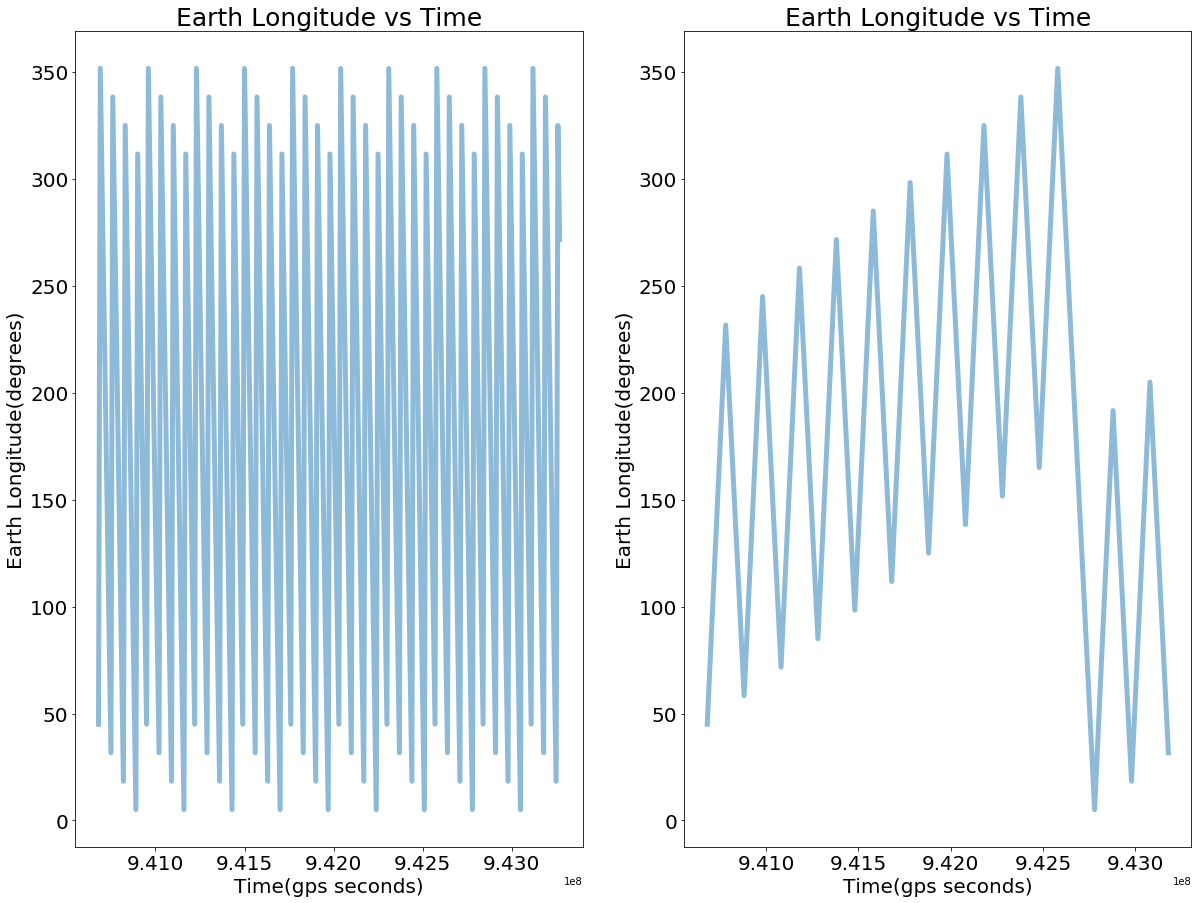

In [8]:
plt.rcParams["figure.figsize"] = (20,15)
plt.subplot(1,2,1)
plt.title("Earth Longitude vs Time",fontsize=25)
plt.xlabel("Time(gps seconds)", fontsize = 20)
plt.ylabel('Earth Longitude(degrees)', fontsize = 20)
plt.tick_params(labelsize = 20)
plt.plot(data[0,::100000], data[2,::100000], lw=5, alpha=0.5)
plt.subplot(1,2,2)
plt.title("Earth Longitude vs Time",fontsize=25)
plt.xlabel("Time(gps seconds)", fontsize = 20)
plt.ylabel('Earth Longitude(degrees)', fontsize = 20)
plt.tick_params(labelsize = 20)
plt.plot(data[0,::1000000], data[2,::1000000], lw=5, alpha=0.5)
plt.show()

This graph shows us the earth longitude in degrees and time in GPS seconds. Since it asks us to have appropriate discrete data, I count the particles at intervals of 10,000, and then sum them up, and take the average. This gives us an accurate description of how the particle count changes over time. The method of 1 per 10,000 data points creates a lot of randomness in our graph, so it is not feasible. By looking at the data, we can see the highest and lowest points of the dispersion. Most of the particles detected are only in the background of cosmic rays, and the deviation could be a gamma-ray burst. Since this is a satellite in low Earth orbit, many of the particles detected are blocked by the Earth. Some of the contamination may be due to instrument failures and gamma-ray bursts blocked by the sun and moon. Talking about the probability of a given number of events occurring at fixed intervals, I think the Poisson distribution will be able to accurately describe the cosmic ray background in our PDF file. By using method above, I could see the general oscillating motion of the particle count. This gives some indications that solar and longitudinal phases play some role in determining the number of particles observed.

2) The background is not consistent across the dataset. Find and describe as accurately as you can how the background changes.

Text(0, 0.5, 'Probability mass function')

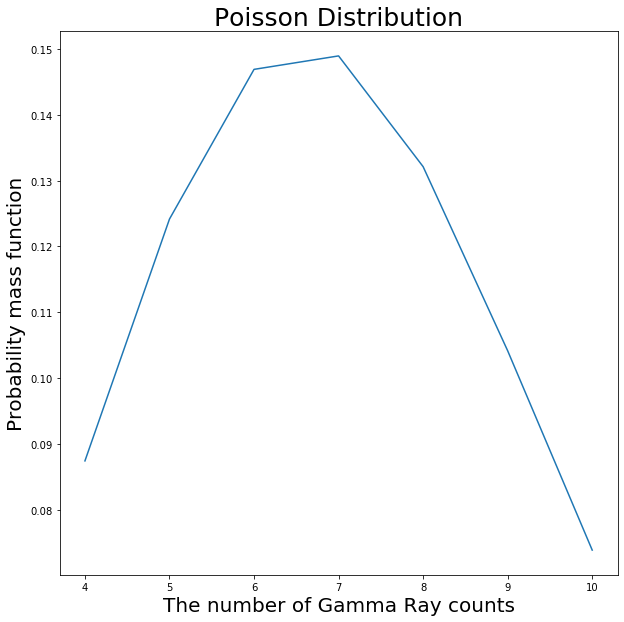

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
mu = np.mean(data[3,:])
x = np.arange(poisson.ppf(0.1, mu), poisson.ppf(0.9, mu))
ax.plot(x, poisson.pmf(x, mu))
plt.title("Poisson Distribution",fontsize=25)
plt.xlabel("The number of Gamma Ray counts", fontsize = 20)
plt.ylabel('Probability mass function', fontsize = 20)

As we can see from the above graph, i used the poisson distribution as a background to model the number of the events in a certain time interval. This graph represents the probability mass function of the numbe of gamma ray counts and we can see that the mean is about 7.

3) Create a model for the background that includes time dependence, and explicitly compare your model to the data. How good is your model of the background?

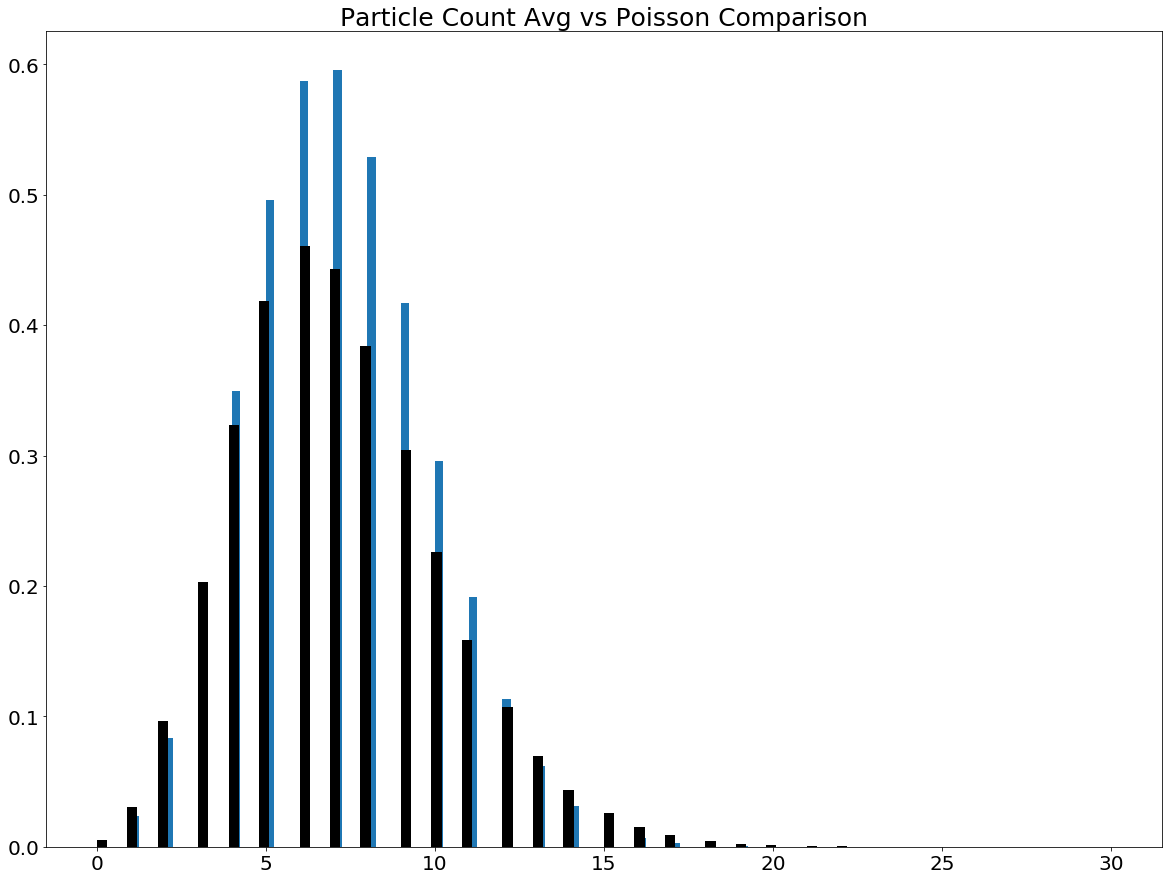

In [10]:
mu = statistics.mean(data[3][::100000])
d_poisson = stats.poisson.rvs(mu, size = 25000000)
plt.tick_params(labelsize = 20)
plt.hist(d_poisson, 100, density=True)
plt.hist(data[3], 100, density=True, color='k')
plt.title("Particle Count Avg vs Poisson Comparison",fontsize=25)
#plt.xlabel("Time(gps seconds)", fontsize = 20)
#plt.ylabel('Particle Count Avg', fontsize = 20)
plt.show()

Here is the graph of a Poisson distribution with the mean value of the particle count dataset. Also there is a distribution of the actual particle count data with respect to time that is overlayed on the top. It is very clear to see that the distribution of the data does not follow the distribution of the Poisson distribution. As we can see that the poisson distribution slightly overpredicts the data around the mean and drops faster than the actual data. I think that a poisson distribution model does a good job since it is relatively consistent with the data around the mean, however as we move towards the edges of the distribution, the differences between them are kind obvious.

4) Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?

In [11]:
five_sigma = stats.norm.sf(5)
fivecounts = int(stats.poisson.isf(five_sigma, 5))
sevencounts = int(stats.poisson.isf(five_sigma, 7))
print('For 5 counts, a 5 sigma threshold value is ' + str(fivecounts ))
print('For 7 counts, a 5 sigma threshold value is ' + str(sevencounts))

For 5 counts, a 5 sigma threshold value is 20
For 7 counts, a 5 sigma threshold value is 24


Problem 2

In this problem we are going to look at a stack of telescope images (again simulated). We have 10 images, but you and your lab partner will be looking for different signals. One of you will be looking for the faintest stars, while the other will be looking for a transient (something like a super novae that only appears in one image). Flip a coin to determine which of you is pursuing which question.

1) Dowload the data from images.h5. This is a stack of 10 square images, each 200 pixels on a side.

In [12]:
hf = h5py.File('images.h5', 'r') 
hf.keys()
data2 = np.array(hf.get('imagestack'))
hf.close() 

2) Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? Develop a plan to calculate your background pdf().

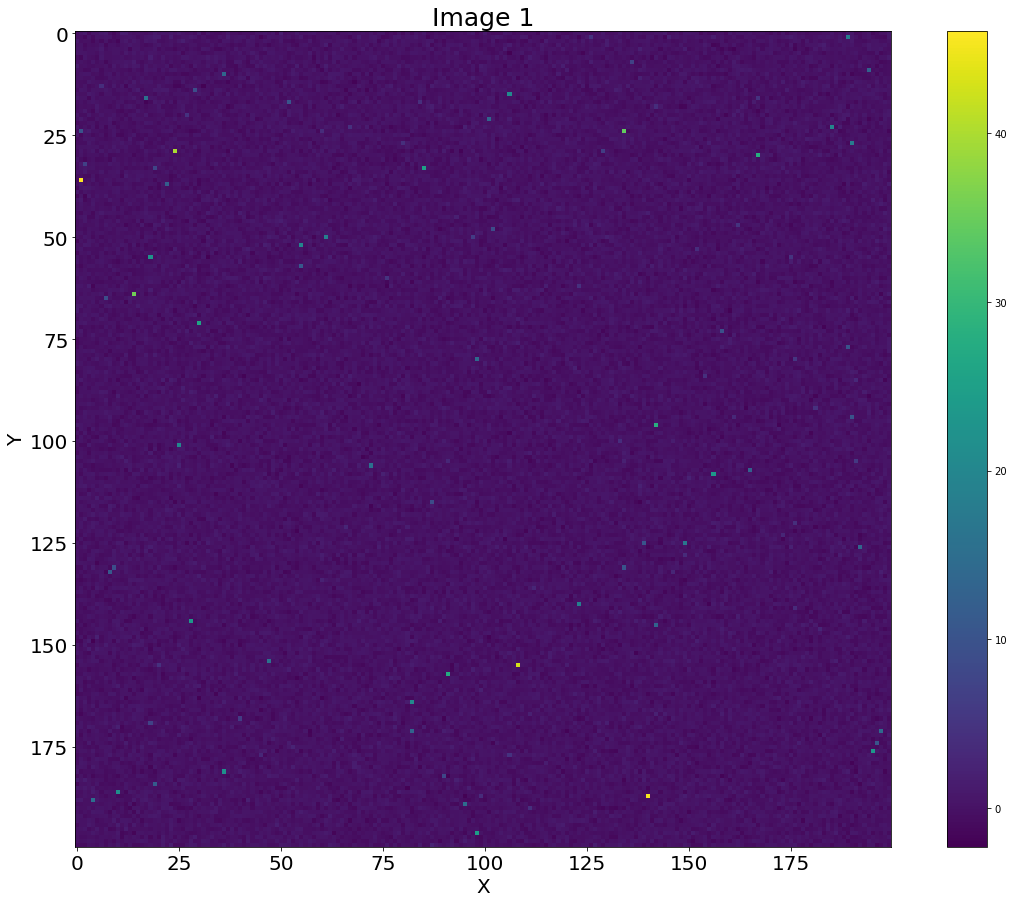

Text(0, 0.5, 'y position')

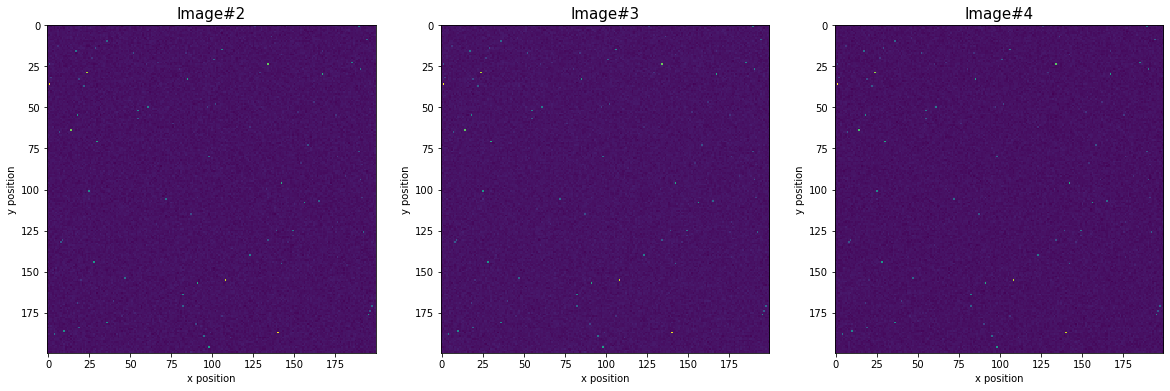

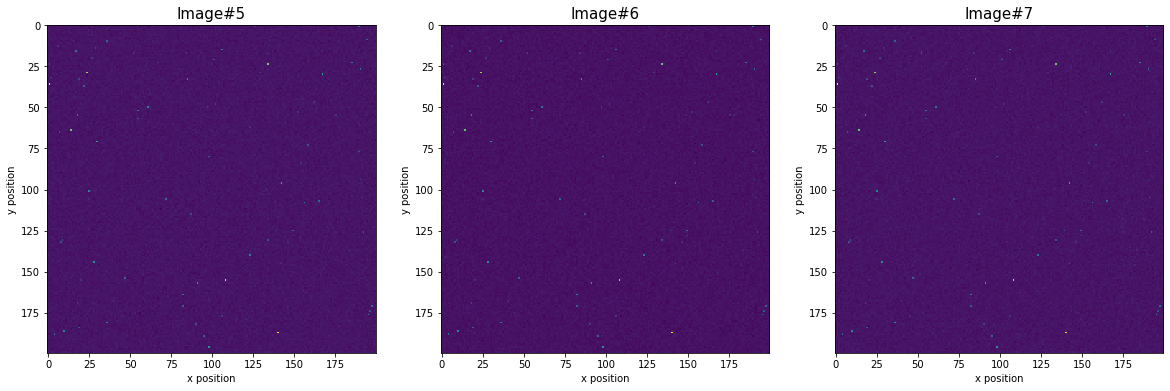

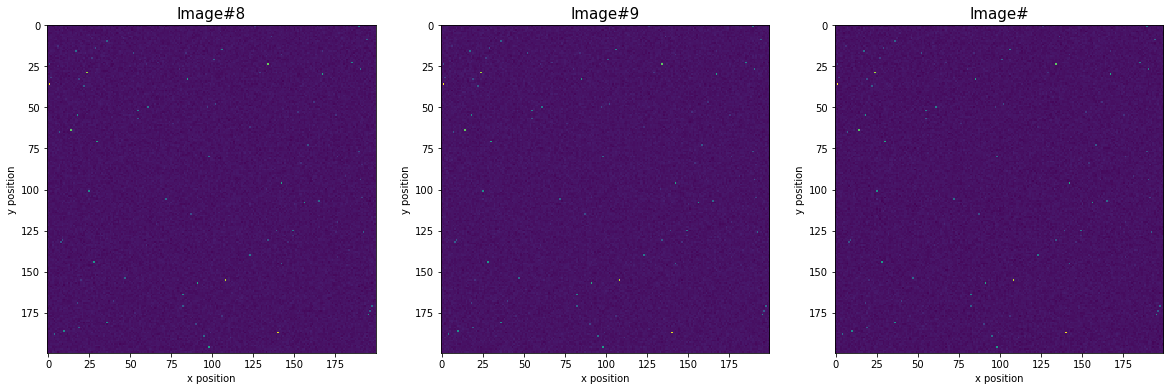

In [35]:
plt.title('Image 1', fontsize = 25)
plt.tick_params(labelsize = 20)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.imshow(data2[:,:,0])
plt.colorbar()
plt.show()
fig, ax = plt.subplots(1, 3)

ax[0].set_title("Image#2",fontsize=15)
ax[0].set_xlabel("x position",fontsize=10)
ax[0].set_ylabel("y position",fontsize=10)
ax[0].imshow(data2[:,:,0])

ax[1].imshow(data2[:,:,1])
ax[1].set_title("Image#3",fontsize=15)
ax[1].set_xlabel("x position",fontsize=10)
ax[1].set_ylabel("y position",fontsize=10)

ax[2].imshow(data2[:,:,2])
ax[2].set_title("Image#4",fontsize=15)
ax[2].set_xlabel("x position",fontsize=10)
ax[2].set_ylabel("y position",fontsize=10)

fig, ax = plt.subplots(1, 3)
ax[0].imshow(data2[:,:,3])
ax[0].set_title("Image#5",fontsize=15)
ax[0].set_xlabel("x position",fontsize=10)
ax[0].set_ylabel("y position",fontsize=10)

ax[1].imshow(data2[:,:,4])
ax[1].set_title("Image#6",fontsize=15)
ax[1].set_xlabel("x position",fontsize=10)
ax[1].set_ylabel("y position",fontsize=10)

ax[2].imshow(data2[:,:,5])
ax[2].set_title("Image#7",fontsize=15)
ax[2].set_xlabel("x position",fontsize=10)
ax[2].set_ylabel("y position",fontsize=10)

fig, ax = plt.subplots(1, 3)
ax[0].imshow(data2[:,:,6])
ax[0].set_title("Image#8",fontsize=15)
ax[0].set_xlabel("x position",fontsize=10)
ax[0].set_ylabel("y position",fontsize=10)

ax[1].imshow(data2[:,:,7])
ax[1].set_title("Image#9",fontsize=15)
ax[1].set_xlabel("x position",fontsize=10)
ax[1].set_ylabel("y position",fontsize=10)

ax[2].imshow(data2[:,:,8])
ax[2].set_title("Image#",fontsize=15)
ax[2].set_xlabel("x position",fontsize=10)
ax[2].set_ylabel("y position",fontsize=10)






I have shown the 10 images with x and y values that are the exponents of the data points and i also showed the color bar which shows the strength with it corresponding color and we can use that to help interpret the data. As we can see that there is the yellow data points that means the stat is burning very brightly and i think that would be a signal pollution. Under these 10 images, the distribution of brightness appears to be very similar and fairly uniform which means the background is time independent. These images collect data at the same time, so the background must be time independent. And also those images look like the same. I plan to calculate the background PDF by taking the average of all at each point in the dataset, and then find the probability distributions of different brightness. 

Text(0, 0.5, 'number of counts')

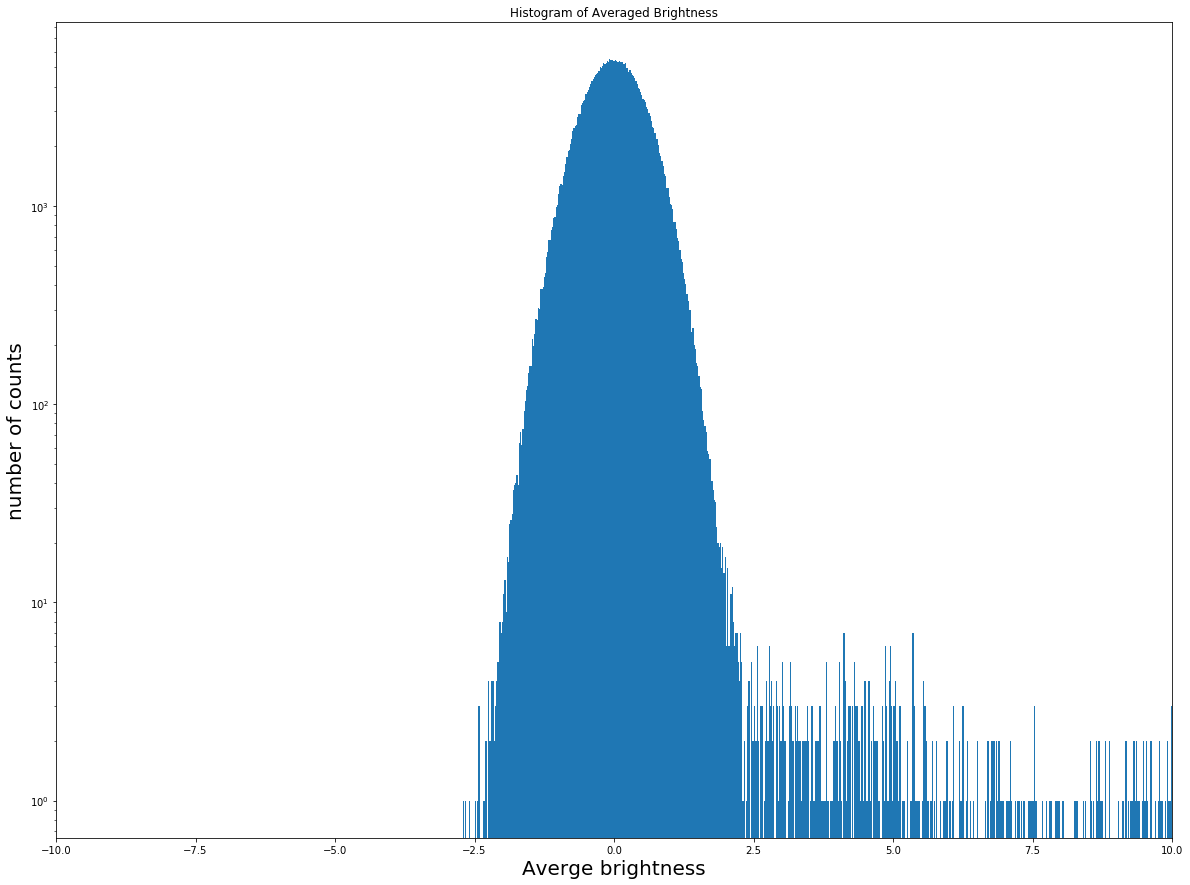

In [46]:

average = []
for i in range(200):
    for j in range(200):
        for k in range(9):
            ave = np.mean(data3[i,j,k])
            average.append(ave)

plt.hist(average, bins = 'auto');
plt.xlim(-10,10);
plt.yscale('log')
plt.title('Histogram of Averaged Brightness')
plt.xlabel('Averge brightness',fontsize=20)
plt.ylabel('number of counts',fontsize=20)

3) Using your background distribution, hunt for your signal (transient). Describe what you find.

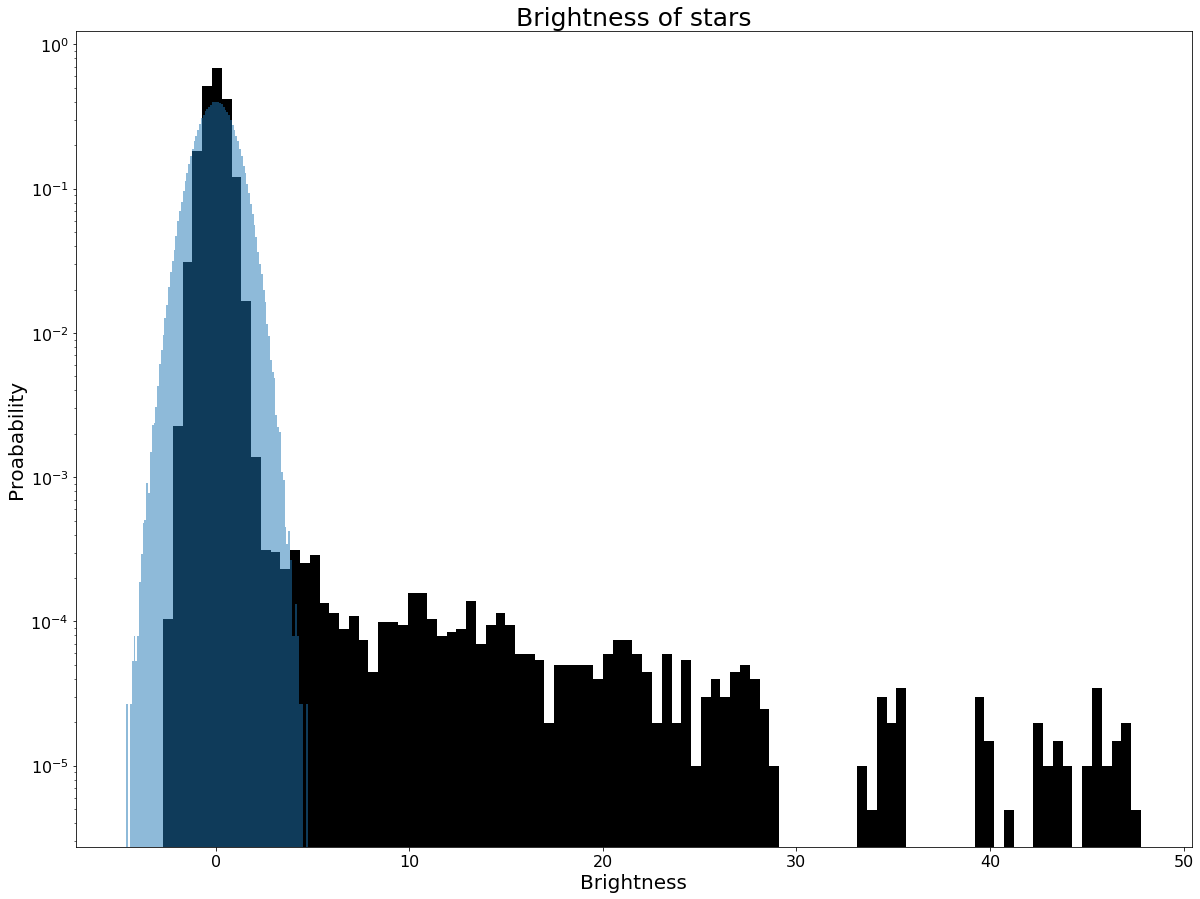

Highest star brightness: 47.79010819628649


In [69]:
star = []
for i in range(10):
    for j in range(200):
        for k in range(200):
            star.append(data2[j,k,i])
plt.yscale('log')
plt.hist(star, 100, density=True, color='k')
mu = statistics.mean(star)
plt.tick_params(labelsize = 16)
plt.xlabel('Brightness', fontsize = 20)
plt.ylabel('Proabability', fontsize = 20)
plt.title('Brightness of stars', fontsize = 25)
norm = stats.norm.rvs(mu, size=len(stardata))
plt.hist(norm, 100, density=True, alpha=.5)
plt.show()
print("Highest star brightness: " + str(np.max(stardata)))

As seen in this data there is a lot ofboundaries in our data set. I believe that a transient star occurs at the 5 sigma probability for a standardized normal distribution. 

In [70]:
uniqueStar = []

for i in range(200):
    for j in range(200):
        counter = 0
        if data2[i,j,0] > 40:
            counter = counter + 1
        if data2[i,j,1] > 40:
            counter = counter + 1
        if data2[i,j,2] > 40:
            counter = counter + 1
        if data2[i,j,3] > 40:
            counter = counter + 1
        if data2[i,j,4] > 40:
            counter = counter + 1
        if data2[i,j,5] > 40:
            counter = counter + 1
        if data2[i,j,6] > 40:
            counter = counter + 1
        if data2[i,j,7] > 40:
            counter = counter + 1
        if data2[i,j,8] > 40:
            counter = counter + 1
        if data2[i,j,9] > 40:
            counter = counter + 1
        for k in range(10):
            if(data2[i,j,k] > 40 and counter == 1):
                uniqueStar.append(data2[i,j,k])
                print(i)
                print(j)
                print(k)
                
print(uniqueStar)

29
24
1
[40.83313569396426]


As im trying to find a transient star that is both bright enough that i set the brightness will be at least greater that 40. The result tells me that only image 1 is the  transient.

4) You and your lab partner had different pdf(), but were using the same data. Explore why this is.

It is because we used the same dato but with different purposes. My partner was doing the faintest star and he had to average the brightness of star from those 10 images. I was trying to find the transient which only appear on one image, so i need to  compare every single image that is both bright and rare. Thats why